# Project Name - Loan Eligibility Analysis
# *Developed by:  Ismail Khan*

# Problem Statement

The goal of this analysis is to understand the key factors influencing loan eligibility decisions and identify patterns in the application process. By analyzing applicant details and loan information, the study aims to address the following:

1. **Demographic Trends**:
   - Analyzing the distribution of applicants based on gender and marital status to determine their impact on loan eligibility.

2. **Credit History Evaluation**:
   - Investigating how a good or bad credit history influences the likelihood of loan approval.

3. **Loan Status by Property Area**:
   - Exploring approval rates across urban, semi-urban, and rural areas.

4. **Dependents and Education Impact**:
   - Assessing the role of dependents and education levels in determining loan eligibility.

By addressing these factors, the project provides actionable insights to financial institutions for optimizing their loan eligibility processes and improving accessibility for applicants.

# Objective

The objective of this project is to analyze key factors influencing loan approvals, including demographics, income levels, credit history, and loan characteristics. The goal is to provide insights into approval trends and recommend strategies for improving loan eligibility and decision-making processes.

# *Github Link*

### *https://github.com/ismailkhan11/Sprint-2*

# *Understanding Variable*

**Loan_ID:** A unique identifier for each loan application.

**Applicant_ID:** A unique identifier for individual applying for a loan.

**Gender:** The gender of the applicant. Possible values are "Male" and "Female."

**Married:** Indicates if the applicant is married or not. Possible values are "Yes" or "No."

**Dependents:** The number of dependents (family members) the applicant has. Possible values are "0", "1", "2", "3+."

**Education:** The education level of the applicant. Possible values are "Graduate" or "Not Graduate."

**Self_Employed:** Indicates whether the applicant is self-employed. Possible values are "Yes" or "No."

**ApplicantIncome:** The income of the applicant.

**CoapplicantIncome:** The income of the co-applicant (if applicable).

**LoanAmount:** The loan amount requested by the applicant.

**Loan_Amount_Term:** The term (duration) of the loan in months.

**Credit_History:** The credit history of the applicant. Possible values are "1" (good credit history) or "0" (no/poor credit history).

**Property_Area:** The area where the property is located. Possible values are "Urban," "Rural," and "Semiurban."

**Loan_Status:** The target variable, indicating whether the loan was approved or not. Possible values are "Y" (Yes) or "N" (No).

## Import Necessary Packages

In [39]:
# Import necessary libraries
import mysql.connector # For connecting to MySQL database
import pandas as pd   # Data Manipulation
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # For enhanced visualizations based on Matplotlib

**Insight**   
Imported all necessary packages

## Connection to the MySQL Database

In [40]:
# Establishing Connection to the MySQL Database
db_connection = mysql.connector.connect(
    user='root',  # Replace with your database username
    password='Ismail@2001', # Replace with your database password
    host='localhost', # Host where the database server is running
    database='loan_eligible'  # Name of the database to connect to
)

**Insight**   
A connection is established to the MySQL database using the mysql.connector.connect() method, providing credentials, host, and database name to access the loan_eligible database.

## SQL Query

In [41]:
# SQL Query to Fetch Data
# Using a NATURAL JOIN to combine Applicants and Loans tables based on their common fields.
query = """
SELECT *
FROM Applicants
NATURAL JOIN Loans;
"""

**Insight**   
The SQL query uses NATURAL JOIN to combine data from the Applicants and Loans tables based on their common fields, fetching all columns into the analysis-ready dataset.

# *Loading the dataset to the Notebook*

In [42]:
# Reading Data from the Database into a Pandas DataFrame
# The data fetched using the query will be stored in the DataFrame 'df'.
df = pd.read_sql(query, db_connection)

# Print the dataset
df

C:\Users\ismai\AppData\Local\Temp\ipykernel_17060\2720998445.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


,Loan_ID,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,LoanAmount,Loan_Amount_Term,Loan_Status
0,LP001005,1,Male,Yes,0,Graduate,Yes,3000.0,0.0,1.0,Semiurban,66.0,360,Y
1,LP001006,2,Male,Yes,0,Graduate,No,2583.0,2358.0,1.0,Semiurban,120.0,360,Y
2,LP001008,3,Male,Yes,0,Graduate,No,6000.0,0.0,1.0,Semiurban,141.0,360,Y
3,LP001013,4,Male,Yes,0,Graduate,No,2333.0,1516.0,1.0,Semiurban,95.0,360,Y
4,LP001024,5,Male,Yes,0,Graduate,No,3200.0,700.0,1.0,Semiurban,70.0,360,Y
5,LP001027,6,Male,Yes,0,Graduate,No,2500.0,1840.0,1.0,Semiurban,109.0,360,Y
6,LP001029,7,Male,Yes,0,Graduate,No,1853.0,2840.0,1.0,Semiurban,114.0,360,Y
7,LP001030,8,Male,Yes,0,Graduate,No,1299.0,1086.0,1.0,Semiurban,17.0,120,Y
8,LP001032,9,Male,Yes,0,Graduate,No,4950.0,0.0,1.0,Semiurban,125.0,360,Y
9,LP001034,10,Male,Yes,0,Graduate,No,3596.0,0.0,1.0,Semiurban,100.0,240,Y


**Insight**  
Loading the dataset to jupyter notebook

# *Dataset View*

In [43]:
# Displaying the First Few Rows of the DataFrame
# This is to verify that the data has been fetched and loaded correctly.
df.head()

,Loan_ID,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,LoanAmount,Loan_Amount_Term,Loan_Status
0,LP001005,1,Male,Yes,0,Graduate,Yes,3000.0,0.0,1.0,Semiurban,66.0,360,Y
1,LP001006,2,Male,Yes,0,Graduate,No,2583.0,2358.0,1.0,Semiurban,120.0,360,Y
2,LP001008,3,Male,Yes,0,Graduate,No,6000.0,0.0,1.0,Semiurban,141.0,360,Y
3,LP001013,4,Male,Yes,0,Graduate,No,2333.0,1516.0,1.0,Semiurban,95.0,360,Y
4,LP001024,5,Male,Yes,0,Graduate,No,3200.0,700.0,1.0,Semiurban,70.0,360,Y


**Insight**   
Here we print first five rows of the dataset.

In [44]:
# Display the last 5 rows of the DataFrame
# Purpose: Verifies the structure and content of the last few records in the dataset
df.tail()

,Loan_ID,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,LoanAmount,Loan_Amount_Term,Loan_Status
45,LP001228,46,Female,Yes,1,Graduate,No,3200.0,2254.0,0.0,Urban,126.0,180,N
46,LP001241,47,Female,Yes,1,Not Graduate,No,3000.0,0.0,0.0,Urban,136.0,360,N
47,LP001252,48,Female,No,2,Not Graduate,No,2800.0,1800.0,0.0,Urban,216.0,360,N
48,LP001253,49,Female,No,2,Not Graduate,No,2000.0,1000.0,0.0,Rural,197.0,360,N
49,LP001254,50,Female,No,3,Not Graduate,No,2900.0,1500.0,0.0,Rural,240.0,360,N


**Insight**    
Here we print last five rows of the dataset

In [45]:
# Check the shape of the dataset
# Output: (rows, columns)
df.shape

(50, 14)

**Insight**   
Here we print row and column size of the dataset

# *Dataset Description*

In [46]:
# Gives the overall info of the dataframe object
df.describe()

,Applicant_ID,Dependents,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,1.000000,3274.380000,1043.360000,0.800000,109.220000,343.200000
std,14.57738,1.010153,1180.858368,1136.761059,0.404061,42.356741,52.893424
min,1.00000,0.000000,1299.000000,0.000000,0.000000,17.000000,120.000000
25%,13.25000,0.000000,2528.250000,0.000000,1.000000,89.750000,360.000000
50%,25.50000,1.000000,3126.500000,1020.000000,1.000000,113.000000,360.000000
75%,37.75000,2.000000,3729.250000,1830.000000,1.000000,131.250000,360.000000
max,50.00000,3.000000,7660.000000,3796.000000,1.000000,240.000000,360.000000


**Insight**   
The df.describe() method provides a statistical summary of the dataset. It shows key metrics such as count, mean, standard deviation, and range (min, max) for numerical columns.

# *Dataset Information*

In [47]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            50 non-null     object 
 1   Applicant_ID       50 non-null     int64  
 2   Gender             50 non-null     object 
 3   Married            50 non-null     object 
 4   Dependents         50 non-null     int64  
 5   Education          50 non-null     object 
 6   Self_Employed      50 non-null     object 
 7   ApplicantIncome    50 non-null     float64
 8   CoapplicantIncome  50 non-null     float64
 9   Credit_History     50 non-null     float64
 10  Property_Area      50 non-null     object 
 11  LoanAmount         50 non-null     float64
 12  Loan_Amount_Term   50 non-null     int64  
 13  Loan_Status        50 non-null     object 
dtypes: float64(4), int64(3), object(7)
memory usage: 5.6+ KB


**Insight**   
We use info() to get concise summary of our dataset i.e column, non null , count , memory usage and datatype.

# *Data Cleaning*

In [48]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()

Loan_ID              0
Applicant_ID         0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Property_Area        0
LoanAmount           0
Loan_Amount_Term     0
Loan_Status          0
dtype: int64

**Insight**   
We used isnull().sum() to identify missing values in the DataFrame. The output shows no missing values, so no data cleaning is required.

# *Duplicate Values*

In [49]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**Insight**   
Here we can see there are 0 duplicates rows in our dataset. After checking for duplicate rows in the dataset, we ensure that each entry is unique.

# *Check Unique Values*

In [50]:
# Check for unique values in each column
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"Column {col} has {unique_values} unique values.")

Column Loan_ID has 50 unique values.
Column Applicant_ID has 50 unique values.
Column Gender has 2 unique values.
Column Married has 2 unique values.
Column Dependents has 4 unique values.
Column Education has 2 unique values.
Column Self_Employed has 2 unique values.
Column ApplicantIncome has 43 unique values.
Column CoapplicantIncome has 26 unique values.
Column Credit_History has 2 unique values.
Column Property_Area has 3 unique values.
Column LoanAmount has 38 unique values.
Column Loan_Amount_Term has 4 unique values.
Column Loan_Status has 2 unique values.


**Insight**   
Here we checked all unique values from our Dataset. Checking for unique values helps us understand the variability in categorical and numerical features.

# **Data Visualization**

# **Visualization 1**

C:\Users\ismai\AppData\Local\Temp\ipykernel_17060\1463640920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Gender', palette='Blues')


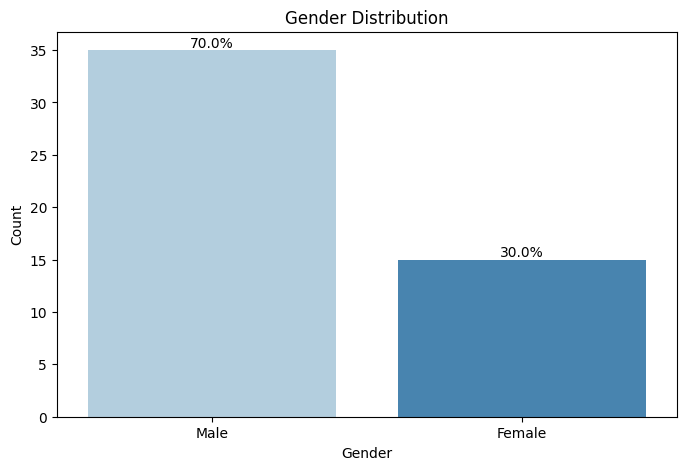

In [57]:
# Gender Distribution with Percentages
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Gender', palette='Blues')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')

# Adding percentages on top of the bars
total = len(df)  # Total number of entries in the dataset
for bar in ax.patches:
    percentage = f'{(bar.get_height() / total) * 100:.1f}%'  # Calculate percentage
    ax.annotate(percentage, 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position
                ha='center', va='bottom', fontsize=10, color='black')  # Styling

plt.show()

**Insight**   
The visualization represents the gender distribution of loan applicants. The data reveals that a higher proportion of applicants are male compared to female, as depicted by the bar chart. This analysis helps understand the demographic split of applicants in the dataset, which could influence loan eligibility trends.

# **Visualization 2**

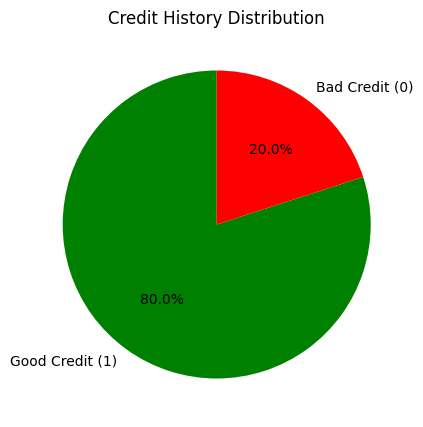

In [52]:
# Credit History Distribution
plt.figure(figsize=(8, 5))
credit_data = df['Credit_History'].value_counts(normalize=True) * 100
credit_data.plot(kind='pie', labels=['Good Credit (1)', 'Bad Credit (0)'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Credit History Distribution')
plt.ylabel('')
plt.show()

**Insight**   
The pie chart illustrates the distribution of applicants based on their credit history. A significant majority (80%) of applicants have a good credit history, while 20% have a bad credit history. This highlights the predominance of applicants with a positive credit standing, which could strongly influence loan eligible decisions.

# **Visualization 3**

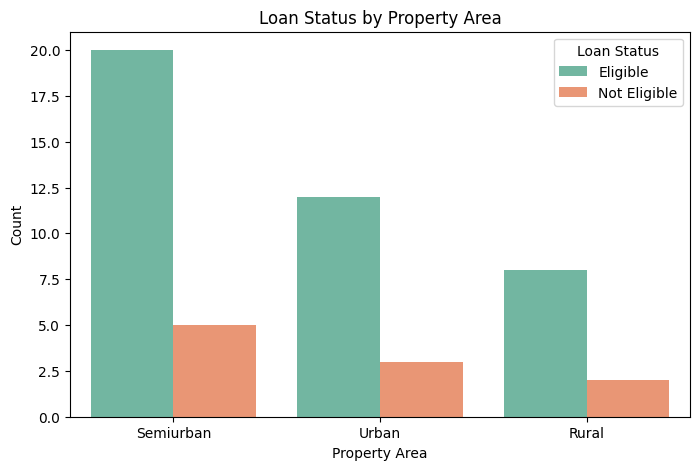

In [53]:
# Loan Status by Property Area
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Property_Area', hue='Loan_Status', palette='Set2')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Eligible', 'Not Eligible'])
plt.show()

**Insight**   
The bar chart demonstrates the distribution of loan eligibility across different property areas. Applicants from semiurban areas show the highest loan eligible rate, followed by urban areas, with rural areas having the lowest eligibles. This suggests that property area may play a significant role in determining loan eligibility.

# **Visualization 4**

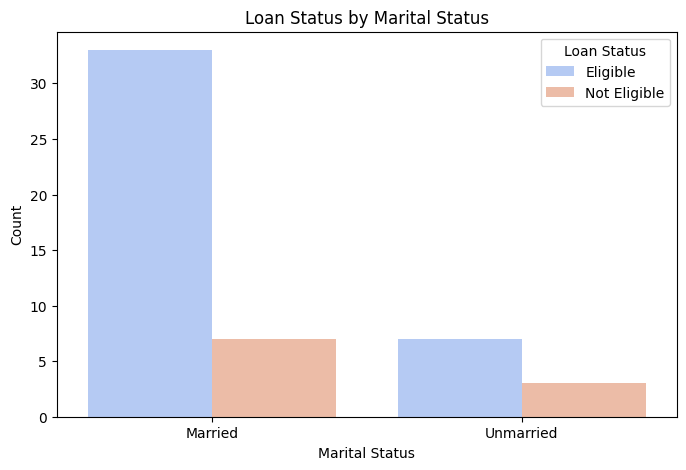

In [54]:
# Loan Status by Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Married', hue='Loan_Status', palette='coolwarm')
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Married', 'Unmarried'])  # Rename x-axis labels
plt.legend(title='Loan Status', labels=['Eligible', 'Not Eligible'])
plt.show()

**Insight**   
The bar chart highlights loan eligibility based on marital status. Married applicants have a significantly higher eligible rate compared to unmarried ones, indicating that being married may positively influence loan eligibility decisions.

# **Visualization 5**

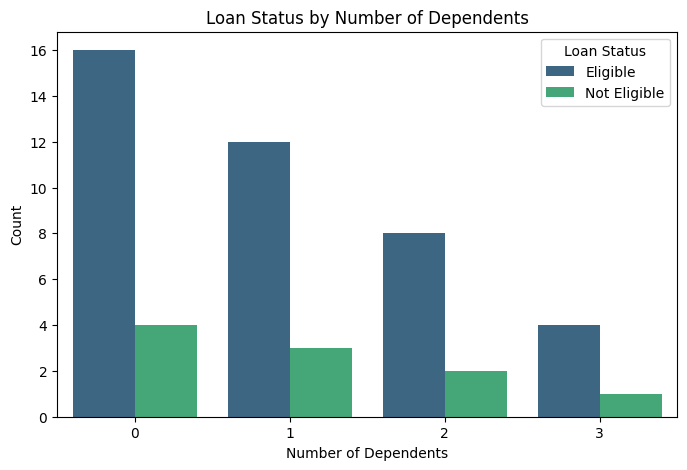

In [55]:
# Loan Status by Number of Dependents
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Dependents', hue='Loan_Status', palette='viridis')
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Eligible', 'Not Eligible'])
plt.show()

**Insight**   
The bar chart shows the relationship between the number of dependents and loan eligibility. Applicants with no dependents are more likely to be eligible for loans, while eligibility decreases as the number of dependents increases. This suggests that fewer dependents may improve the chances of loan eligibility.

# **Visualization 6**

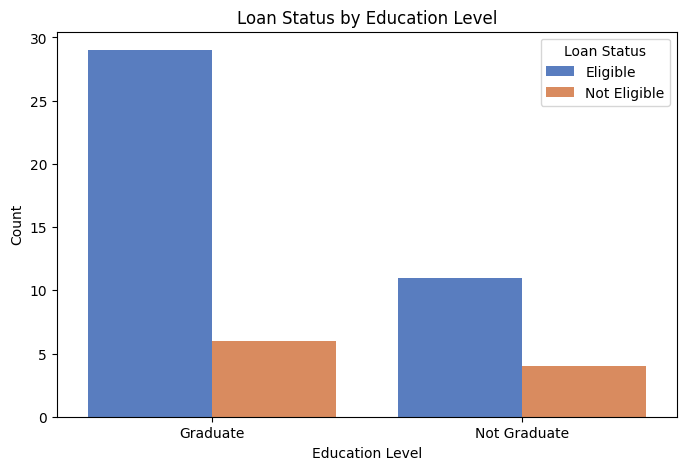

In [56]:
# Loan Status by Education Level
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Education', hue='Loan_Status', palette='muted')
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Eligible', 'Not Eligible'])
plt.show()

**Insight**   
The bar chart depicts loan eligibility by education level. Graduates exhibit a higher loan eligible rate compared to non-graduates, implying that having a graduate-level education might enhance the likelihood of loan eligibility.

# Conclusion

This Loan Eligibility Analysis project provides critical insights into the factors influencing loan approvals, achieved through extensive data cleaning and insightful visualizations. The analysis highlights key variables such as Credit History, Education Level, and Dependents as influential factors that contribute significantly to determining loan eligibility.

By cleaning the data, checking duplicate values, and applying visualizations, the project has enabled a clearer understanding of patterns within the dataset. The visualizations, such as loan status by credit history, marital status, and education level, offer a comprehensive view of how these variables affect loan outcomes.

The visualizations offer a clear understanding of trends and patterns in the data, making it easier for stakeholders to interpret insights. These findings can help financial institutions better understand their applicants' profiles and identify areas where loan approval processes may need adjustment. This project emphasizes the importance of data-driven decision-making and suggests that further analyses could be conducted to optimize loan approval procedures, while ensuring transparency and fairness in lending practices.

# Recommendations

**Emphasize Credit History:**  
Since credit history has a significant impact on loan eligibility, banks should prioritize refining how they assess an applicant's creditworthiness. Providing clear guidance to customers on how to maintain or improve their credit history could increase their chances of approval. Educational campaigns on financial responsibility and credit score management can further enhance applicants' profiles.

**Target Specific Loan Products Based on Education:**  
The analysis shows that graduates have higher approval rates. Banks could offer tailored loan products for graduates with more favorable terms. In parallel, they could develop financial education initiatives for non-graduates to improve their loan eligibility.

**Consider Dependents in Loan Offerings:**  
The data reveals that applicants with fewer dependents tend to be approved more often. Banks can develop special loan packages designed for applicants with more dependents, offering more flexible repayment options or lower interest rates to support families with higher financial responsibilities.

**Focus on Urban and Rural Areas:**  
Loan approvals are higher in semiurban areas. Banks could use this insight to expand their offerings to urban and rural regions by creating more attractive loan products, such as competitive interest rates or relaxed eligibility criteria, to increase approval rates in those areas.

**Data-Driven Decision-Making:**  
Banks can utilize insights from this analysis to make their loan approval process more transparent and data-driven. By focusing on the patterns identified in the data, such as education level, credit history, and dependents, they can streamline their processes and make more informed decisions.

## **Future Enhancements**

1. **Incorporate Machine Learning Models**:
Utilize machine learning algorithms to predict loan eligibility and evaluate their accuracy using metrics like precision, recall, and F1-score.

3. **Streamlit App for User Interaction**:
Develop an interactive web application using Streamlit to allow users to input data and receive real-time loan eligibility predictions.

4. **Time-Series Analysis**:
Analyze loan approval trends over time to identify seasonal patterns or long-term changes.

5. **Automated Reporting**:
Create automated reports summarizing key insights and trends using Python libraries like ReportLab or Power BI.

6. **Feedback Mechanism:**:
   Add functionality to collect user feedback on the loan eligibility predictions to continuously improve the system.